# Time Series Decomposition
**Topics**:
- Classical decomposition
  - Additive decomposition
  - Multiplicative decomposition
  - Classical decomposition using statmodels
- STL decomposition using  statmodels

**Resources**:
- Text book:
  - (3rd ed.) https://otexts.com/fpp3/decomposition.html
  - (2nd ed.) https://otexts.com/fpp2/decomposition.html has more information related to SEATS and X-11 mothods compared the latest edition

- Seasonal decompose using statmodels:
  - https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html#generated-statsmodels-tsa-seasonal-seasonal-decompose--page-root

- STL Decompose using statmodels: https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.STL.html



Components of time series: https://otexts.com/fpp2/tspatterns.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# read the data into DataFrame
sales_data = pd.read_csv('https://tinyurl.com/mr2rv4yh')
sales_data.head()

,Date,store,product,number_sold
0,2010-01-01,0,0,801
1,2010-01-02,0,0,810
2,2010-01-03,0,0,818
3,2010-01-04,0,0,796
4,2010-01-05,0,0,808


#### Data preperation

In [ ]:
# we are interested in product id 2 of store 0
df = sales_data.query('product==2 and store==0')
df = df.reset_index(drop=True)

# set type of date as pd.Datetime and make it index of the DataFrame
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# resample to Daily frequency and ffill nan values if any
df = df.resample('D').fillna(method='ffill')

df['value'] = df['number_sold']

df

,store,product,number_sold,value
Date,,,,
2010-01-01,0,2,893,893
2010-01-02,0,2,871,871
2010-01-03,0,2,862,862
2010-01-04,0,2,887,887
2010-01-05,0,2,891,891
...,...,...,...,...
2018-12-27,0,2,993,993
2018-12-28,0,2,986,986
2018-12-29,0,2,956,956


<Axes: xlabel='Date'>

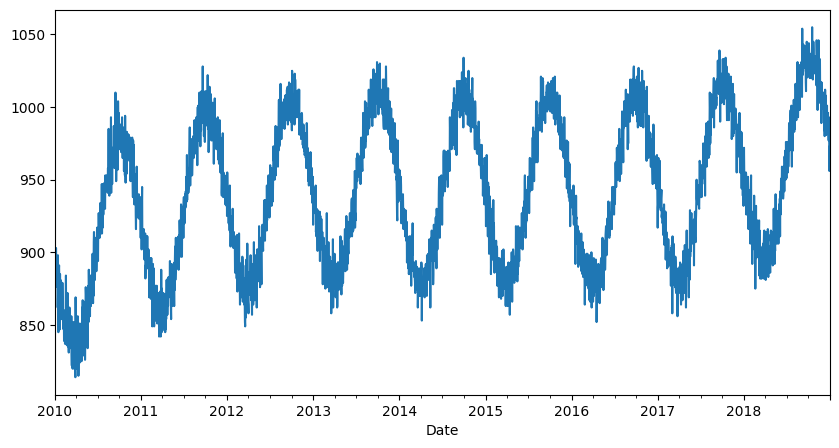

In [ ]:
# plot the sales
df.value.plot(figsize=(10,5))

##**Classical Decomposition**



#### Additive decomposition

The time series is assumed to be the sum of three components:
1. Trend
2. Seasonality
3. Residual

TS = trend + seasonal + residual

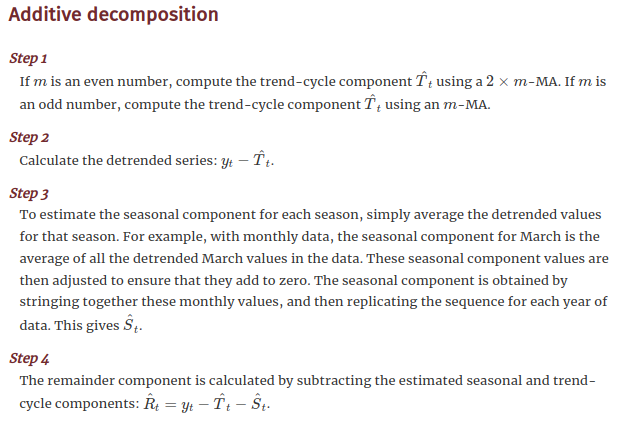

- **Trend**:
It can be observerd from the graph that the overall sales have oncreased over the years. This is due to the trend or the cyclic-trend component. This data is said to have a increasing trend.
- **Seasonality**:
Also, there are patterns that repeat every year. This is because of the **seasonal component** in the time series.

Now, the task is to extract these components for further analysis

- **Residual**: whatever is left after removing the trend and seasonal components from the data is called residual.

In [ ]:
period = 365

<Axes: xlabel='Date'>

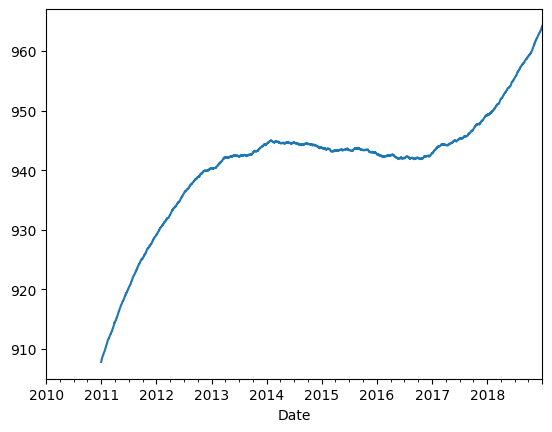

In [ ]:
# extract the cyclic-trend component by taking moving average
trend = df.value.rolling(window=period).mean()
trend.plot()

<Axes: xlabel='Date'>

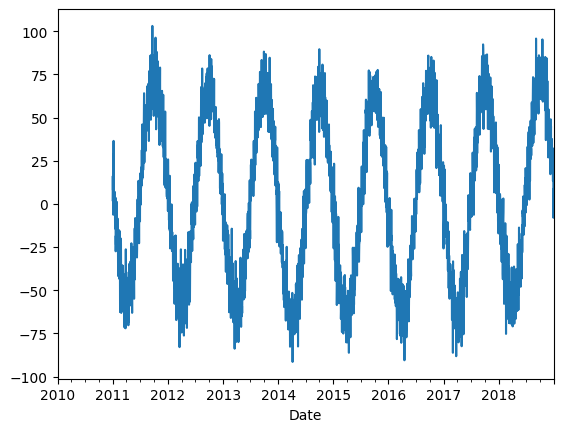

In [ ]:
# Detrended signal is obtained by suctracting trend from the origiginal signal
detrended = df.value - trend
detrended.plot()

<Axes: xlabel='Date'>

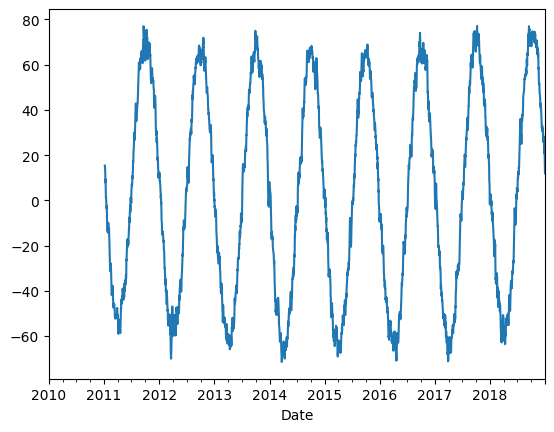

In [ ]:
# seasonal component is obtained by simple averaging the components in detrended signal
seasonal = detrended.rolling(7).mean()
seasonal.plot()

<Axes: xlabel='Date'>

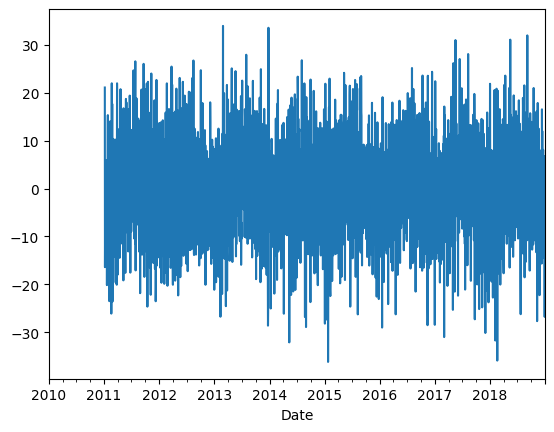

In [ ]:
# Perform seasonal differencing on the seasonal component to obtain the residual component
residual = df.value - trend - seasonal
residual.plot()

Text(0.5, 1.0, 'Residual')

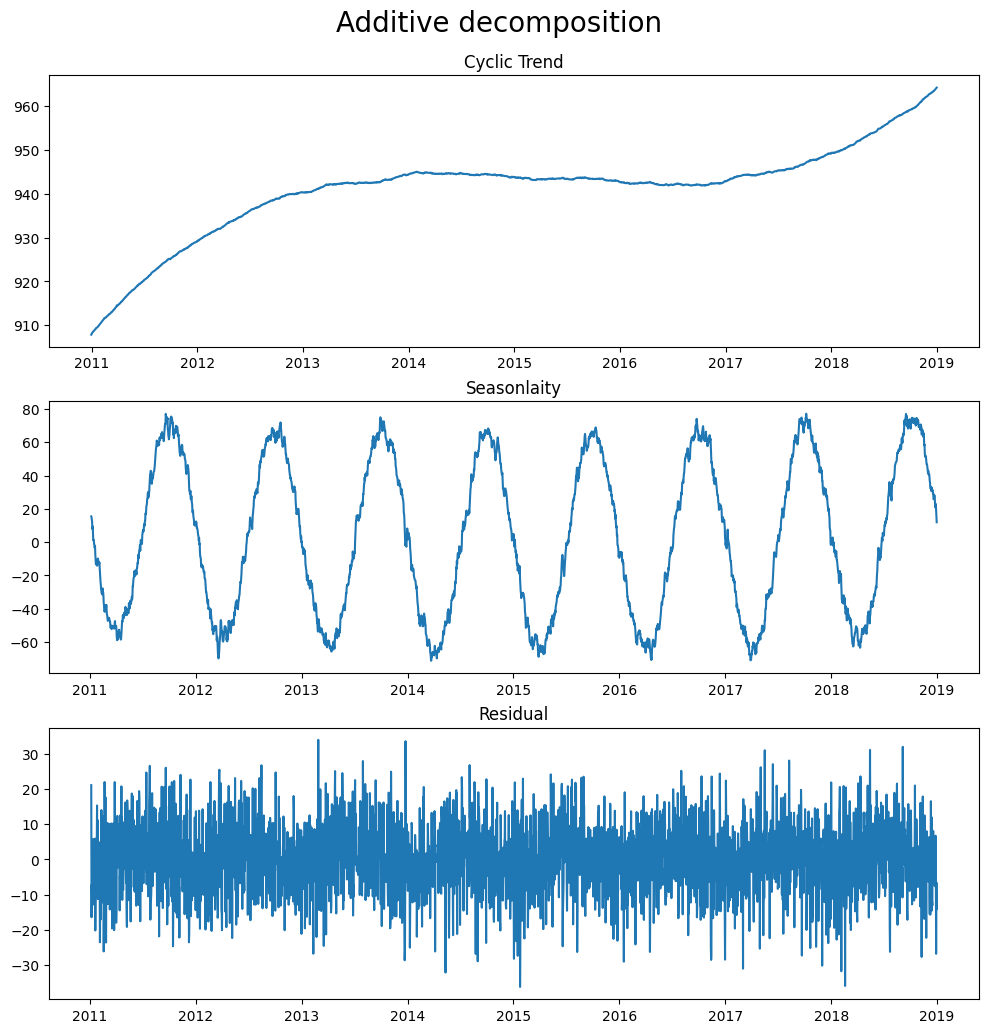

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, figsize=(12,12))
fig.suptitle("Additive decomposition", y = 0.935,fontsize=20)
ax[0].plot(trend)
ax[0].set_title("Cyclic Trend")

ax[1].plot(seasonal)
ax[1].set_title("Seasonlaity")

ax[2].plot(residual)
ax[2].set_title("Residual")

#### Multiplicative Decomposition

The time series is assumed to be the multiplication of three components:

1. Trend
2. Seasonality
3. Residual

TS = trend \* seasonal \* residual

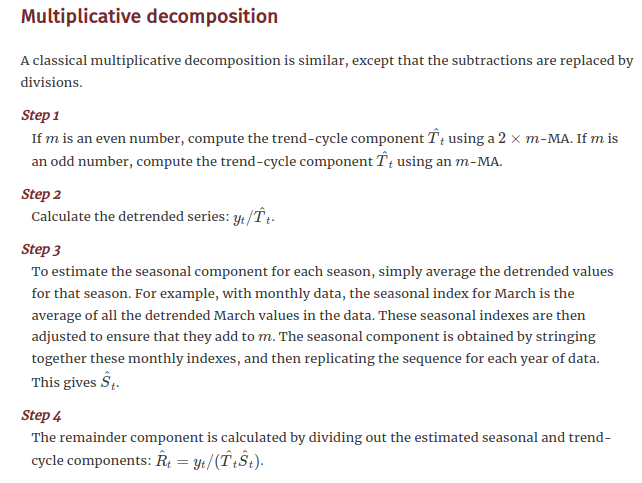

In [ ]:
period = 365
# extract the cyclic-trend component by taking moving average
trend = df.value.rolling(window=?).mean()
trend.plot()

SyntaxError: ignored

In [ ]:
# detrended signal is original signal divided by trend
detrend = df.value ? trend
detrend.plot()

In [ ]:
# seasonal component is obtained by simple averaging the components in detrended signal
seasonal = detrend.rolling(?).mean() #values averaged over a week in this case
seasonal.plot()

In [ ]:
# trend and seasonality are both divided from the original data to obtain the residual component
residual = df.value ? (trend ? seasonal)
residual.plot()

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, figsize=(12,12))
fig.suptitle("Multiplicative decomposition", y = 0.935,fontsize=20)
ax[0].plot(trend)
ax[0].set_title("Cyclic Trend")

ax[1].plot(seasonal)
ax[1].set_title("Seasonlaity")

ax[2].plot(residual)
ax[2].set_title("Residual")

### Decomposition using statmodels

**statsmodels.tsa.seasonal.seasonal_decompose**
https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html#generated-statsmodels-tsa-seasonal-seasonal-decompose--page-root

The additive model is Y[t] = T[t] + S[t] + e[t]

The multiplicative model is Y[t] = T[t] \* S[t] \* e[t]

The results are obtained by first estimating the trend by applying a convolution filter to the data. The trend is then removed from the series and the average of this de-trended series for each period is the returned seasonal component.

**Additive decomposition using statmodels**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df.value, model='additive', period=365)

In [ ]:
fig, ax = plt.subplots(4, figsize=(12,15))
fig.suptitle("Additive decompostition using statmodels", y = 0.935,fontsize=20)

ax[0].plot(df.value)
ax[0].set_title("values")

ax[1].plot(decomposition.trend)
ax[1].set_title("Trend")

ax[2].plot(decomposition.seasonal)
ax[2].set_title("Seasonlaity")

ax[3].plot(decomposition.resid)
ax[3].set_title("Residual")

Notice that this is very similar to the results we obtained without using the statmodels library

**Multiplicative decomposition using statmodels**

In [ ]:
decomposition = seasonal_decompose(?, model=?, period=?)

In [ ]:
fig, ax = plt.subplots(4, figsize=(12,15))
fig.suptitle("multiplicative decompostition using statmodels", y = 0.935,fontsize=20)
ax[0].plot(df.value)
ax[0].set_title("values")

ax[1].plot(decomposition.trend)
ax[1].set_title("Trend")

ax[2].plot(decomposition.seasonal)
ax[2].set_title("Seasonlaity")

ax[3].plot(decomposition.resid)
ax[3].set_title("Residual")

## **STL Decomposition**

In [ ]:
from statsmodels.tsa.seasonal import STL
res = STL(df.value, period=365).fit()

In [ ]:
fig, ax = plt.subplots(4, figsize=(12,15))
fig.suptitle("STL decompostition using statmodels", y = 0.935,fontsize=20)

ax[0].plot(df.value)
ax[0].set_title("values")

ax[1].plot(res.trend)
ax[1].set_title("Trend")

ax[2].plot(res.seasonal)
ax[2].set_title("Seasonlaity")

ax[3].plot(res.resid)
ax[3].set_title("Residual")

____________
Task
____________

Simulate a time series with additive trend(any slope), seasonal(sine wave of any frequency), and random noise.

In [ ]:
len = 1000
x = np.arange(len)

trend = x*2
seasonality = 100*np.sin(2*3.14*x/100)
noise = 10*np.random.randn(len)

ts = trend + seasonality + noise

plt.plot(ts)